🚀 Starting optimized sign language model training
Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1699 - loss: 3.2151 - val_accuracy: 0.0364 - val_loss: 3.2854 - learning_rate: 0.0010
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5922 - loss: 1.5054 - val_accuracy: 0.0919 - val_loss: 3.1077 - learning_rate: 0.0010
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - loss: 0.9399 - val_accuracy: 0.1508 - val_loss: 2.8024 - learning_rate: 0.0010
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.6766 - val_accuracy: 0.2080 - val_loss: 2.5268 - learning_rate: 0.0010
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8804 - loss: 0.4987 - val_accuracy: 0.3206 - val_loss: 2.3024 - learning_rate: 0.0010
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8815 - loss: 0.4943 - val_accuracy: 0.5217 - val_loss: 1.6977 - learning_rate: 0.0010
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

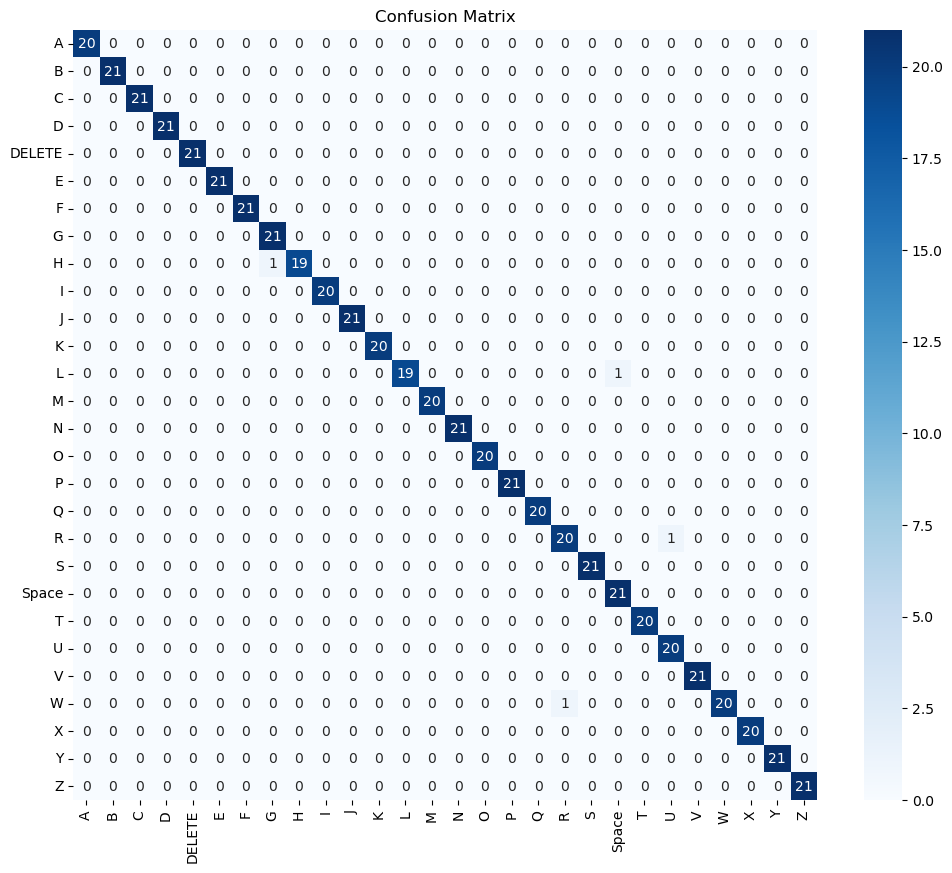


✅ Training complete! Models saved:
- sign_language_model.keras (final model)
- best_model.keras (best validation performance)


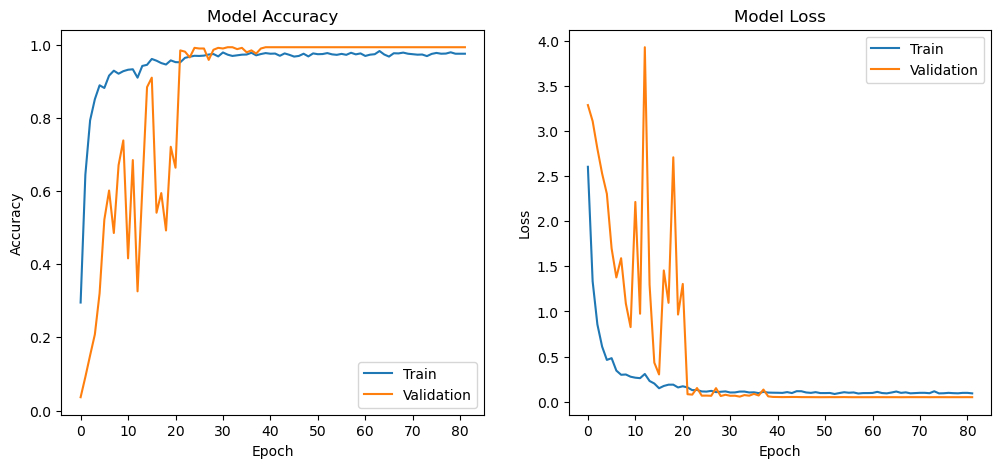

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_data(csv_files):
    """Load and preprocess data with tensor shape consistency"""
    dfs = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            if 'label' not in df.columns:
                print(f"Warning: File {file} missing 'label' column - skipping")
                continue
            dfs.append(df)
        except Exception as e:
            print(f"Error loading {file}: {e}")
            continue
    
    if not dfs:
        raise ValueError("No valid data files could be loaded")
    
    data = pd.concat(dfs, ignore_index=True).fillna(0)
    
    # Convert to numpy arrays with consistent dtype
    X = data.drop('label', axis=1).astype('float32').values
    y = data['label'].values
    
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    if len(le.classes_) < 2:
        raise ValueError("Need at least 2 different classes for classification")
    
    return train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    ), le

def create_optimized_model(input_shape, num_classes):
    """Create model with optimized function tracing"""
    model = Sequential([
        Input(shape=(input_shape,), dtype='float32'),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def evaluate_model(model, X_test, y_test, le):
    """Optimized evaluation with proper tensor conversion"""
    # Convert to tensor with static shape
    X_test_tensor = tf.convert_to_tensor(X_test, dtype='float32')
    y_pred = model(X_test_tensor, training=False)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    print("\nClassification Report:")
    print(classification_report(
        y_test, y_pred_classes, 
        target_names=le.classes_,
        zero_division=0
    ))
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        confusion_matrix(y_test, y_pred_classes),
        annot=True, fmt='d', cmap='Blues',
        xticklabels=le.classes_, yticklabels=le.classes_
    )
    plt.title('Confusion Matrix')
    plt.show()

def train_model(model, X_train, y_train, X_test, y_test):
    """Training with optimized data pipeline"""
    # Create TensorFlow Dataset objects
    train_data = tf.data.Dataset.from_tensor_slices(
        (X_train.astype('float32'), y_train))
    train_data = train_data.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
    
    val_data = tf.data.Dataset.from_tensor_slices(
        (X_test.astype('float32'), y_test))
    val_data = val_data.batch(32).prefetch(tf.data.AUTOTUNE)
    
    callbacks = [
        EarlyStopping(patience=15, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.1, patience=5),
        ModelCheckpoint(
            'best_model.keras',
            save_best_only=True,
            monitor='val_accuracy',
            mode='max'
        )
    ]
    
    history = model.fit(
        train_data,
        validation_data=val_data,
        epochs=100,
        callbacks=callbacks,
        verbose=1
    )
    return history

def main():
    print("🚀 Starting optimized sign language model training")
    
    try:
        # Replace with your actual CSV files
        csv_files = [
            'collected_data/A.csv',
            'collected_data/B.csv',
            'collected_data/C.csv',
            'collected_data/D.csv',
            'collected_data/DELETE.csv',
            'collected_data/E.csv',
            'collected_data/F.csv',
             'collected_data/G.csv',
            'collected_data/H.csv',
             'collected_data/I.csv',
            'collected_data/J.csv',
            'collected_data/K.csv',
            'collected_data/L.csv',
             'collected_data/M.csv',
            'collected_data/N.csv',
             'collected_data/O.csv',
            'collected_data/P.csv',
            'collected_data/Q.csv',
            'collected_data/R.csv',
             'collected_data/S.csv',
             'collected_data/Space.csv',
            'collected_data/T.csv',
             'collected_data/U.csv',
            'collected_data/V.csv',
            'collected_data/W.csv',
            'collected_data/X.csv',
             'collected_data/Y.csv',
            'collected_data/Z.csv',
             
            
            # Add more files as needed
        ]
        
        # Load and preprocess data
        (X_train, X_test, y_train, y_test), le = load_and_preprocess_data(csv_files)
        
        # Create and train model
        model = create_optimized_model(X_train.shape[1], len(le.classes_))
        history = train_model(model, X_train, y_train, X_test, y_test)
        
        # Evaluate and save
        evaluate_model(model, X_test, y_test, le)
        save_model(model, 'sign_language_model.keras')
        
        print("\n✅ Training complete! Models saved:")
        print("- sign_language_model.keras (final model)")
        print("- best_model.keras (best validation performance)")
        
        # Plot training history
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train')
        plt.plot(history.history['val_accuracy'], label='Validation')
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train')
        plt.plot(history.history['val_loss'], label='Validation')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()
        
    except Exception as e:
        print(f"\n❌ Error during training: {str(e)}")

if __name__ == "__main__":
    main()